In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
%matplotlib inline

Some Notations and  equations

-----------------

sample mean = $\bar{y} = \frac{{\sum_{i=1}^{i=n}x_{i}}}{n}$

sample variance = $S^2 = \frac{\sum_{i=1}^{i=n}(x_{i} - \bar{x})^2}{n-1}$

sum of square = SS = $\sum_{i=1}^{i=n}(x_{i} - \bar{x})^2$

$S^2 = \frac{SS}{n-1}$


---------------------
$\chi^2$ Distribution

- if $x_{i} \sim N(0,1)$, and $z = x_{1}^2 + x_{2}^2 + x_{3}^2 + ..... + x_{k}^2$, then $z \sim \chi^{2}_{k}$  distribution with $'k'$ degree of freedom


- similarly, if $x_{i} \sim N(\mu, \sigma^2)$, and $z=\frac{(x_{1} - \mu)^2 + (x_{2} - \mu)^2 + ....+ (x_{k} - \mu)^2}{\sigma^2}$, then $z \sim \chi^{2}_{k}$  distribution with $'k'$ degree of freedom


- on similar lines, $z = \frac{\sum_{i=1}^{i=k}(x_{i} - \bar{x})^2}{\sigma^2} \sim \chi^{2}_{k-1}$ distribution with $(k-1)$, dof 
    - note, (k-1), because we use sample mean $\bar{x}$ and not population mean $\mu$

------------------------
Below we simulate all of the above three case and compare with chi-square distribution as obtained from scipy.stats.chi2

In [2]:
def chi_square_distribution_comparison(mu=0, sigma=1, k=100, generation_type=1, num_iter=100):
    chi_generated = []
    for i in range(num_iter):
        x = np.random.normal(loc=mu, scale=sigma,size=k)
        if generation_type == 1:
            z = np.sum((x-mu)**2)/sigma
            df = k
        else:
            z = np.sum((x-np.mean(x))**2)/sigma
            df = k-1
        chi_generated.append(z)
        
    chi_generated = np.sort(chi_generated)
    
    #learning density from z
    density = gaussian_kde(chi_generated)

    
    chi_generated_xs = density(chi_generated)

    chi_sq = st.chi2.pdf(chi_generated, df=df)

    plt.figure(figsize=(10,5))
    plt.plot(chi_generated, chi_generated_xs, label="generated chi square")
    plt.plot(chi_generated, chi_sq, label="actual chi")
    plt.vlines(df, 0, np.max(chi_sq))
    plt.legend()
    plt.show()

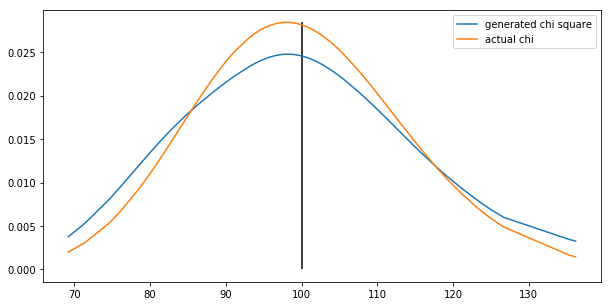

In [5]:
chi_square_distribution_comparison()

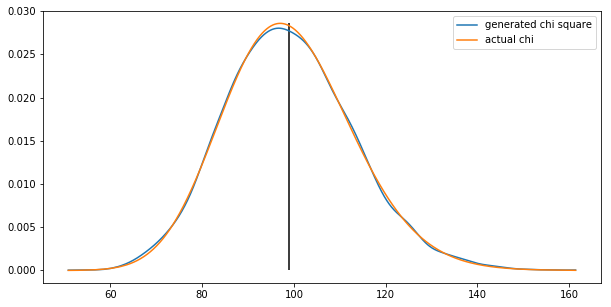

In [6]:
chi_square_distribution_comparison(generation_type=2, num_iter=10000)

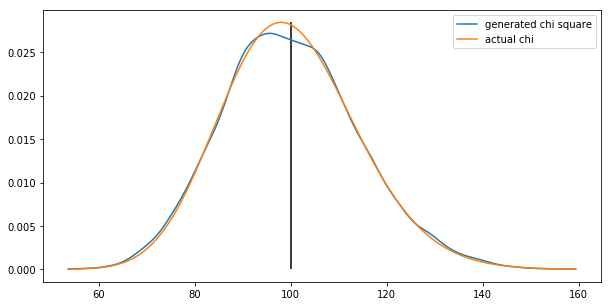

In [7]:
chi_square_distribution_comparison(generation_type=1, num_iter=10000)

------------------

$z = \frac{\sum_{i=1}^{i=k}(x_{i} - \bar{x})^2}{\sigma^2} \sim \chi^{2}_{k-1}$ => $\frac{SS}{\sigma^2} \sim \chi^{2}_{k-1}$

$S^2 = \frac{SS}{k-1}$ => $S^2 \sim \frac{\sigma^2}{k-1} \chi^{2}_{k-1}$

* Above, implies sample varaince follows chi-sqaure distribution with 'k-1' dof
    * 'k' number of sample
    * not really, chi-sqaure distribution but constant time chi-sqaure distribution
    
* Hence, $\chi^{2}_{k}$ distribution is used when performing hypothesis testing for a varaince

------------------

t-distribution 

--------------------

- if z and $\chi^2_{k}$ are standard normal and chi-square random variable then, $\large t_{k} = \frac{z}{\sqrt{\frac{\chi^2_{k}}{k}}}$, is a t-distirbution with 'k'degree of freedom

In [8]:
def t_distribution_comparison(mu=0, sigma=1, k=100, num_var=100):
    z = np.random.normal(loc=mu,scale=sigma, size=num_var)
    chi = np.random.chisquare(df=k, size=num_var)
    chi = chi/k
    chi_sqrt = np.sqrt(chi)
    
    t = z/chi_sqrt
    density = gaussian_kde(t)
    t_sorted = np.sort(t)
    

    t_scipy = st.t.pdf(t_sorted, df=k, loc=mu, scale=sigma)
    t_simulated = density(t_sorted)
    
    plt.figure(figsize=(10,5))
    plt.plot(t_sorted, t_scipy, label='t distribution scipy')
    plt.plot(t_sorted, t_simulated, label='t simulated denisty')
    plt.vlines(mu, 0, np.max(t_scipy), label="mean")
    plt.legend()
    plt.title("Simulated and Actual 't' distirbution for dof {},\n mean {} and variance {}".format(k, mu, k/(k-2)))
    plt.show()
    print("Simulated data:\n Mean {} \n Variance {}".format(np.mean(t), np.var(t)))
    mean, var = st.t.stats(df=k, loc=mu, scale=sigma, moments='mv')
    print("Scipy:\n Mean {}\n Var {}".format(mean, var))
    
    

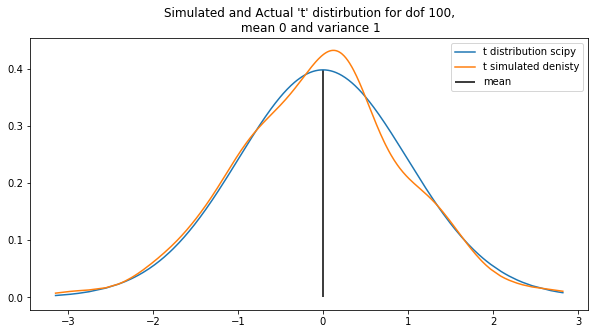

Simulated data:
 Mean -0.0434282445381 
 Variance 0.96548453107
Scipy:
 Mean 0.0
 Var 1.02040816327


In [9]:
t_distribution_comparison(num_var=1000)

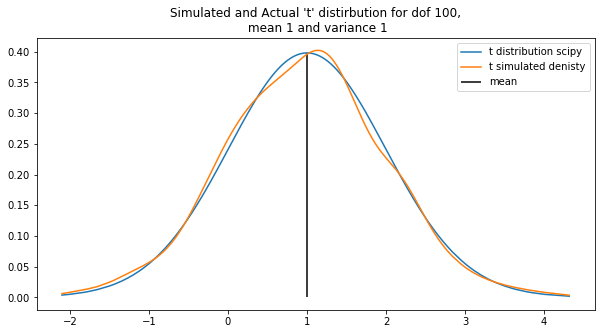

Simulated data:
 Mean 0.973277118011 
 Variance 1.00191144396
Scipy:
 Mean 1.0
 Var 1.02040816327


In [10]:
t_distribution_comparison(mu=1, sigma=1, num_var=1000)

- if $y_{1}, y_{2}......,y_{k}$ is random sample from $N(\mu, \sigma^2)$, then quantity

 $\large t = \frac{\bar{y} - \mu}{\frac{S}{\sqrt{k}}}$, follows t-distirbution with $'k-1'$ degree of freedom

In [11]:
def t_distirbution_comparison_1(mu=0, sigma=1, k=100, num_iter=1000):
    val = []
    for i in range(num_iter):
        y = np.random.normal(loc=mu, scale=sigma, size=k)
        y_bar = np.mean(y)
        s = np.sqrt(np.sum((y-y_bar)**2)/(k-1))
        numerator = (y_bar - mu)
        denominator = s / np.sqrt(k)
        
        val.append(numerator / denominator)
        
    density = gaussian_kde(val)
    val_sorted = np.sort(val)
    t_scipy = st.t.pdf(val_sorted, df=k-1)
    t_simulated = density(val_sorted)
    
    plt.figure(figsize=(10,5))
    plt.plot(val_sorted, t_scipy, label="t distirbution scipy")
    plt.plot(val_sorted, t_simulated, label='t distirbution simulated')
    plt.vlines(0, 0, np.max(t_scipy))
    plt.legend()
    plt.title("Simulated and Actual t-distirbution for\n mean {} and dof {}".format(mu, k))
    plt.show()
    # we dont use mu and sigma when generating t-distirbution from scipy
    # Reason: simulated quantity is already normalized
    mean, var = st.t.stats(df=k-1,  moments='mv')
    print("Simulated:\n mean {}, var {}".format(np.mean(val), np.var(val)))
    print("Scipy: \n mean {}, var {}".format(mean, var ))
    

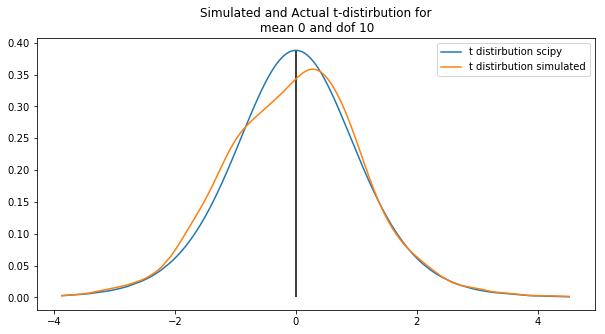

Simulated:
 mean -0.020253159677, var 1.27009210494
Scipy: 
 mean 0.0, var 1.28571428571


In [12]:
t_distirbution_comparison_1(k=10)

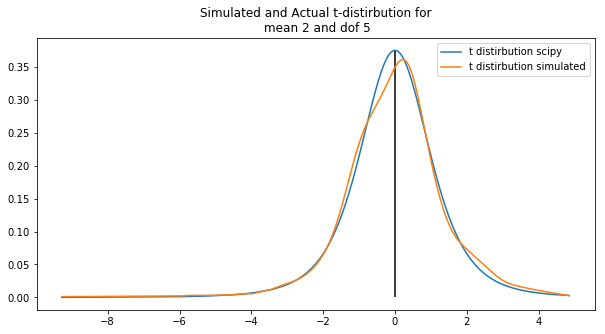

Simulated:
 mean 0.00661614624401, var 1.84598833447
Scipy: 
 mean 0.0, var 2.0


In [13]:
t_distirbution_comparison_1(mu=2, sigma=1, k=5)

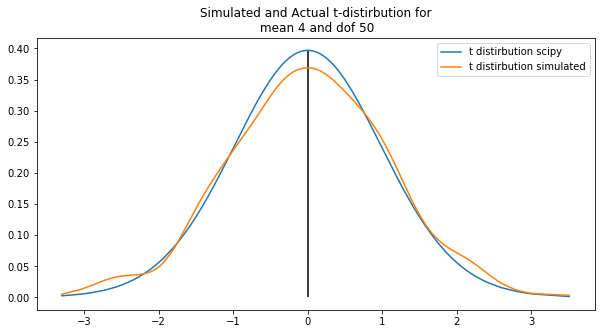

Simulated:
 mean 0.012384450686, var 1.14027857806
Scipy: 
 mean 0.0, var 1.04255319149


In [14]:
t_distirbution_comparison_1(mu=4, sigma=1, k=50)

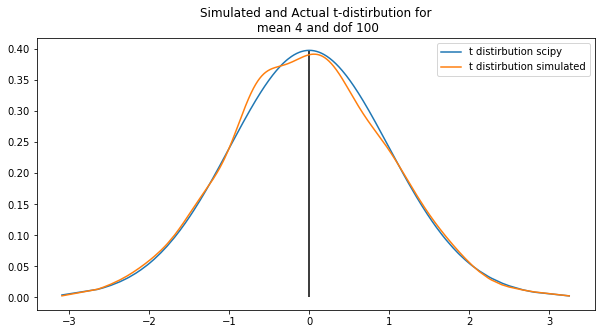

Simulated:
 mean -0.0157107500157, var 0.963210500195
Scipy: 
 mean 0.0, var 1.0206185567


In [15]:
t_distirbution_comparison_1(mu=4, sigma=10, k=100)

* From above we can see, that difference between sample mean and population when divided by standard deviation (error), follows t-distirbution with 'sample-1' degree of freedom
* This is the reason why 't' distirbution is used when creating hypothesis about population mean from sample mean

* We will see application of this in sometime

----------------------

F-Distribution

* if $\chi^2_{u}$ and $\chi^2_{v}$ are two independent chi-sqaure random variables with 'u' and 'v' degree of freedom, then ratio 

$\Large F_{u,v} = \frac{\frac{\chi^2_{u}}{u}}{\frac{\chi^2_{v}}{v}}$, follows F-distribution with 'u' numerator degree of freedom and 'v' denominator degree of freedom

In [18]:
def f_distribution_comparison(u,v, num_sample=1000):
    numerator = np.random.chisquare(df=u,  size=num_sample)/ u
    denominator = np.random.chisquare(df=v, size=num_sample) / v
    
    f = numerator / denominator
    
    density = gaussian_kde(f)
    f_sorted = np.sort(f)
    
    f_scipy = st.f.pdf(f_sorted, dfn=u, dfd=v)
    f_simulated = density(f_sorted)
    
    plt.figure(figsize=(10,5))
    plt.plot(f_sorted, f_scipy, label='f scipy')
    plt.plot(f_sorted, f_simulated, label='f simulated')
    plt.legend()
    plt.show()
    mean, var = st.f.stats(dfn=u, dfd=v, moments='mv')
    print("Simulated:\n mean {}, var {}".format(np.mean(f), np.var(f)))
    print("Scipy: \n mean {}, var {}".format(mean, var))

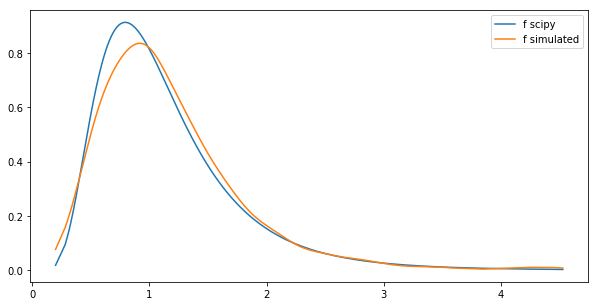

Simulated:
 mean 1.17123812587, var 0.367021382045
Scipy: 
 mean 1.15384615385, var 0.399408284024


In [19]:
f_distribution_comparison(20,15)

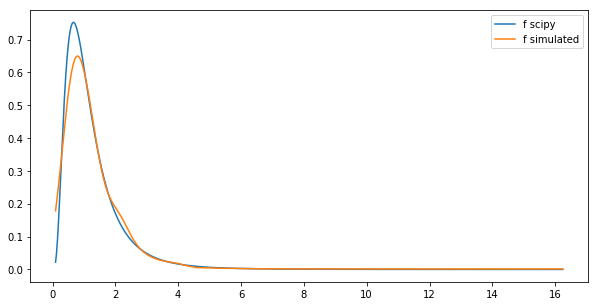

Simulated:
 mean 1.253895777709326, var 1.1311866522790237
Scipy: 
 mean 1.25, var 0.9375


In [204]:
f_distribution_comparison(10,10)

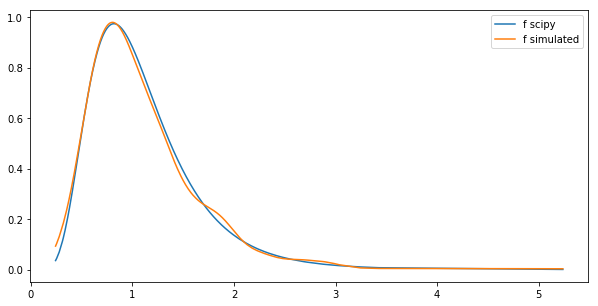

Simulated:
 mean 1.09229089773, var 0.27523734354
Scipy: 
 mean 1.11111111111, var 0.293209876543


In [20]:
f_distribution_comparison(20,20)

--------------------
* from above we know

    $\Large S^2 \sim \frac{\sigma^2}{n-1} \chi^2_{n-1}$ and $\Large F_{u,v} = \frac{\frac{\chi^2_{u}}{u}}{\frac{\chi^2_{v}}{v}}$
    
* if $y_{11}, y_{12}, ......., y_{1n1}$ and $y_{21}, y_{22},.............., y_{2n2}$ are sample from two different normal population with same varaince $\sigma^2$, then quantity

$\large \frac{S^2_{1}}{S^2_{2}} \sim F_{n_{1}-1, n_{2}-1}$

In [21]:
def f_distribution_comparison_with_ratio_of_two_sample_varaince(mu1,mu2, sigma, n1, n2, num_iter=1000):
    val = []
    for i in range(num_iter):
        y1 = np.random.normal(loc=mu1, scale=sigma, size=n1)
        y2 = np.random.normal(loc=mu2, scale=sigma, size=n2)
        
        s1 = np.var(y1)
        s2 = np.var(y2)
        
        val.append(s1/s2)
    val_sorted = np.sort(val)
    density = gaussian_kde(val_sorted)
    
    f_scipy = st.f.pdf(val_sorted, dfn=n1-1, dfd=n2-1)
    f_simulated = density(val_sorted)
    
    plt.figure(figsize=(10,5))
    plt.plot(val_sorted, f_scipy, label='f scipy')
    plt.plot(val_sorted, f_simulated, label='f simulated')
    plt.legend()
    plt.show()
    mean, var = st.f.stats(dfn=n1, dfd=n2, moments='mv')
    print("Simulated:\n mean {}, var {}".format(np.mean(val), np.var(val)))
    print("Scipy: \n mean {}, var {}".format(mean, var))
        
        

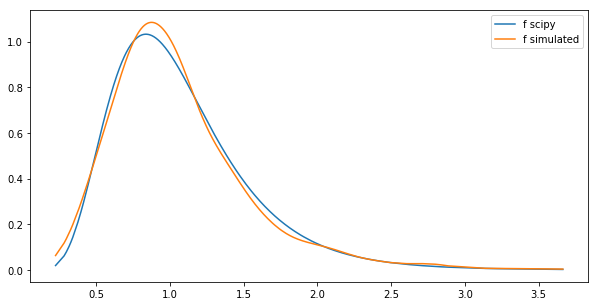

Simulated:
 mean 1.05653407816, var 0.212061676784
Scipy: 
 mean 1.07142857143, var 0.211930926217


In [23]:
f_distribution_comparison_with_ratio_of_two_sample_varaince(mu1=1, mu2=2, sigma=10, n1=20, n2=30)